# HOMEWORK5_GROUP4

- Deekshitha Gona Id: 2399282
- Yuzhen Hu  Id: 2299391
- Jayaprakash Yadav Guntumani Id: 2391724
- Aakanksha Govindaraju Id: 2384001
- George Dani Id: 1844097

## Importing libraries

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from mlxtend.plotting import plot_decision_regions

## extracting data

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
df = pd.read_csv(url, header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
df.columns = ["Sex", "Length", "Diameter", "Height", "Whole weight", "Shucked weight", "Viscera weight", "Shell weight", "Rings"]

In [4]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
df.shape

(4177, 9)

In [6]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [7]:
df['Sex'].unique()

array(['M', 'F', 'I'], dtype=object)

In [8]:
df['Sex'].value_counts()

,count
Sex,
M,1528
I,1342
F,1307


#### We have used one-hot encoding to convert categorical values to dummy variables

### We used one-hot encoding to convert the 'Sex' column into dummy variables, dropping one category to prevent multicollinearity. This resulted in two new columns: 'Sex_I' and 'Sex_M', indicating the presence of the values 'I' (Intersex) and 'M' (Male), with 'F' (Female) as the baseline.

In [9]:
df_sex = pd.get_dummies(df['Sex'], drop_first=True)
df_sex.columns = ['Sex_I', 'Sex_M']

In [10]:
df_sex.head()

,Sex_I,Sex_M
0,False,True
1,False,True
2,False,False
3,False,True
4,True,False


In [13]:
df_sex = df_sex.astype(int)

In [14]:
df_sex.head()

,Sex_I,Sex_M
0,0,1
1,0,1
2,0,0
3,0,1
4,1,0


#### Replacing Sex column with encoded variables

In [15]:
df.drop(columns=['Sex'], inplace=True)

In [16]:
df = pd.concat([df, df_sex], axis=1)

In [17]:
df.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,1,0


<Axes: ylabel='Rings'>

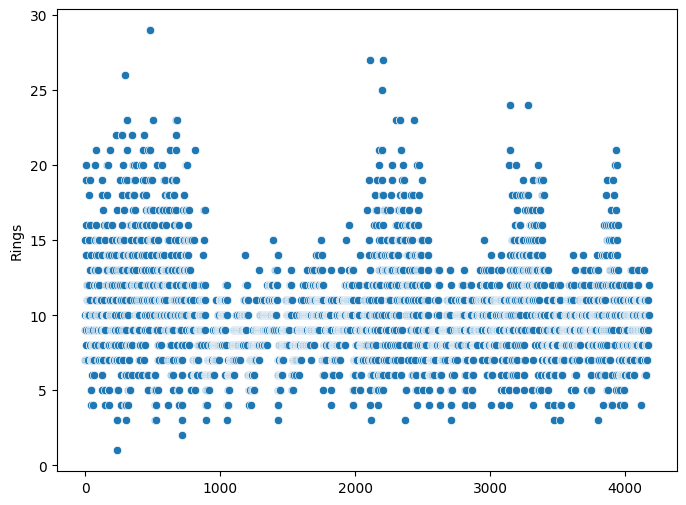

In [18]:
plt.figure(figsize = (8,6))
sns.scatterplot(df['Rings'])

In [19]:
df.columns

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings', 'Sex_I', 'Sex_M'],
      dtype='object')

In [20]:
y = df['Rings']
X = df.drop(columns=['Rings'])

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3341, 9), (836, 9), (3341,), (836,))

#### Used KNN for predicting Rings

In [23]:
knn_reg = KNeighborsRegressor(n_neighbors=30)

In [24]:
knn_reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=30)

In [25]:
y_pred = knn_reg.predict(X_test)

In [26]:
mean_squared_error(y_test, y_pred)

4.865536948431685

In [27]:
r2_score(y_test, y_pred)

0.5505364858552193

In [28]:
gs = GridSearchCV(estimator = KNeighborsRegressor(),
                  param_grid = {"n_neighbors": range(1,51),
                                "weights": ['uniform', 'distance'],
                                "p": [1,2]},
                  cv=5)

gs.fit(X_train, y_train)

gs.cv_results_

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


{'mean_fit_time': array([0.00517855, 0.00512176, 0.00559635, 0.0052835 , 0.00552878,
        0.00497384, 0.00498834, 0.00515404, 0.00514388, 0.00532975,
        0.00536513, 0.0053689 , 0.00511494, 0.00546536, 0.00583444,
        0.00499053, 0.0053947 , 0.00496159, 0.00483642, 0.00501571,
        0.00492435, 0.00529943, 0.00500832, 0.00501094, 0.0051898 ,
        0.00501022, 0.00629878, 0.0051754 , 0.00539021, 0.00487232,
        0.00492749, 0.00484052, 0.00496521, 0.00515852, 0.00496659,
        0.0048666 , 0.00488405, 0.00559483, 0.00488563, 0.00492616,
        0.00510488, 0.00478439, 0.00499587, 0.00477018, 0.00486927,
        0.00487003, 0.00487952, 0.00511093, 0.00550394, 0.00510101,
        0.00496054, 0.00481639, 0.00480156, 0.00482173, 0.00484681,
        0.00560794, 0.00483375, 0.00480843, 0.00740561, 0.00964451,
        0.00813923, 0.00781255, 0.00784006, 0.00776186, 0.0076684 ,
        0.00915518, 0.00854917, 0.00777431, 0.00827947, 0.00823045,
        0.00859933, 0.00783033,

#### After doing Grid Search, finding best score and parameters

In [29]:
gs.best_score_

0.5350054367191776

In [30]:
gs.best_params_

{'n_neighbors': 17, 'p': 2, 'weights': 'distance'}

In [31]:
y_pred1 = gs.predict(X_test)

In [32]:
r2_score(y_test, y_pred1)

0.552091703004832

In [33]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)

#### To get the best value of k, we have plotted mse vs k values

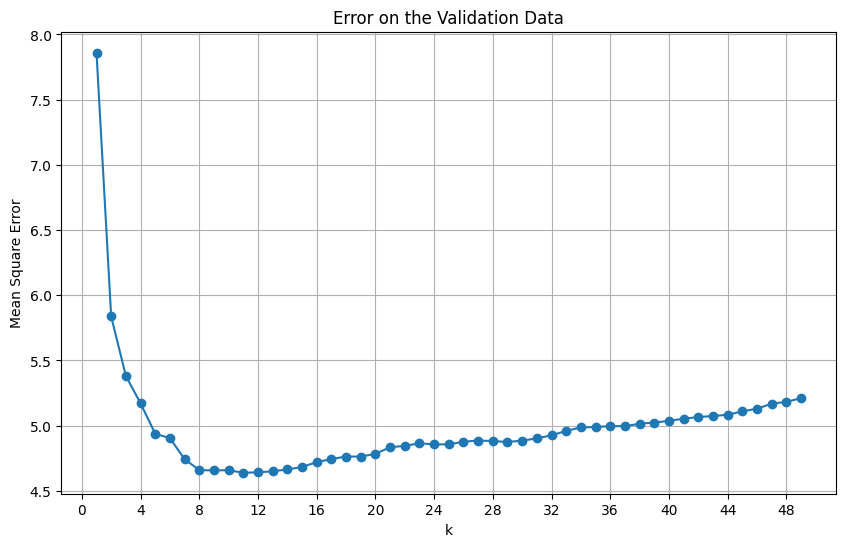

In [35]:
k_values = []
error = []

for k in range(1, 50):
    model = KNeighborsRegressor(n_neighbors = k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    error.append(mean_squared_error(y_valid, y_pred))
    k_values.append(k)


plt.figure(figsize = (10, 6))

plt.plot(k_values, error, marker = "o")
plt.title("Error on the Validation Data")
plt.xlabel("k")
plt.ylabel("Mean Square Error")
plt.xticks(np.arange(0, 50, step=4))
plt.grid();

## by dropping the sex coulumn

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
df = pd.read_csv(url, header=None)

# Assigning column names
df.columns = ["Sex", "Length", "Diameter", "Height", "Whole weight", "Shucked weight", "Viscera weight", "Shell weight", "Rings"]

# Drop the 'Sex' column
df.drop(columns=['Sex'], inplace=True)

# Define target and features
y = df['Rings']  # Target variable
X = df.drop(columns=['Rings'])  # Features

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the K-Nearest Neighbors Regressor
knn_reg = KNeighborsRegressor(n_neighbors=30)

# Train the model
knn_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

# Optional: Hyperparameter tuning using GridSearchCV
param_grid = {
    "n_neighbors": range(1, 51),
    "weights": ['uniform', 'distance'],
    "p": [1, 2]
}

gs = GridSearchCV(estimator=KNeighborsRegressor(), param_grid=param_grid, cv=5)
gs.fit(X_train, y_train)

# Best parameters and model performance
print(f"Best Score from GridSearchCV: {gs.best_score_}")
print(f"Best Parameters from GridSearchCV: {gs.best_params_}")

# Make predictions with the best model
y_pred_best = gs.predict(X_test)

# Evaluate the model with the best parameters
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"Mean Squared Error (Best Model after hyperparameter tuning): {mse_best}")
print(f"R² Score (Best Model after hyperparameter tuning): {r2_best}")


Mean Squared Error: 4.894292929292929
R² Score: 0.5478800957491405
Best Score from GridSearchCV: 0.5503001445269027
Best Parameters from GridSearchCV: {'n_neighbors': 22, 'p': 2, 'weights': 'distance'}
Mean Squared Error (Best Model after hyperparameter tuning): 4.858052099130008
R² Score (Best Model after hyperparameter tuning): 0.5512279134829676


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


# Observations:

**1. Mean Squared Error (MSE):**
Before Tuning: 4.894
After Tuning: 4.858
Mean Squared Error (MSE) is a metric that measures the average squared difference between the predicted values and the actual values (true values). The lower the MSE, the closer the predictions are to the actual data points. Since the model is minimizing errors, a smaller MSE indicates better performance.

In your case, after tuning the hyperparameters, the MSE improved slightly, decreasing from 4.894 to 4.858, meaning the predictions became a bit more accurate.

**2. R² Score:**
Before Tuning: 0.5478
After Tuning: 0.5512
The R² Score (Coefficient of Determination) measures how well the independent variables (features) explain the variance in the dependent variable (target). It ranges from 0 to 1:

A score of 1 indicates that the model perfectly explains all the variance in the target variable.
A score of 0 means that the model does not explain any variance, i.e., it performs no better than simply predicting the mean of the target variable.
Your R² Score improved slightly from 0.5478 to 0.5512 after tuning. This means that approximately 55.1% of the variance in the target variable (number of rings) is explained by the best model, while the remaining 44.9% is due to unexplained factors or noise.

**3. Best Score from GridSearchCV:**
Best Score: 0.5503
The Best Score from GridSearchCV represents the best cross-validated R² score achieved during the hyperparameter tuning process. This score (0.5503) indicates how well the model generalized to unseen data during cross-validation. It’s slightly better than the initial model’s R² score, showing that the tuning helped improve the model's generalization performance.

**4. Best Parameters from GridSearchCV:**
Best Parameters: {'n_neighbors': 22, 'p': 2, 'weights': 'distance'}
These are the optimal hyperparameters found by GridSearchCV:

n_neighbors: 22 (The model uses the 22 nearest neighbors for predictions).
p: 2 (This means the distance metric is Euclidean distance since p=2 corresponds to the Euclidean distance formula).
weights: 'distance' (Weights are assigned based on the inverse of the distance to the neighbors, giving closer points more influence on the prediction).


**Summary:**
Before tuning, the model had a reasonable performance with an MSE of 4.894 and an R² score of 0.5478.
After tuning, the model improved slightly, reducing the error (MSE) to 4.858 and increasing the explained variance (R² score) to 0.5512.
The GridSearchCV process optimized the model by finding the best hyperparameters, which slightly enhanced the performance based on both the MSE and R² metrics.